In [1]:
%matplotlib inline


import numpy as np

import xarray as xr

import regionmask 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
import netCDF4 as nc
import scipy
import pandas
from glob import glob
import pandas as pd

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

In [ ]:
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our custom colormap

In [ ]:

GMA_asgm= xr.open_dataset('/net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory/GMA_emissions_ASGM_Hg0.0.25x0.25.2015.nc')

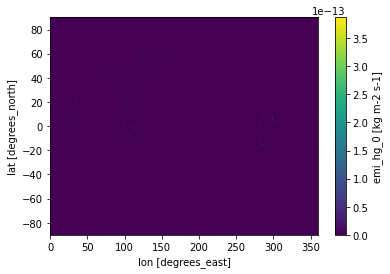

In [23]:
GMA_asgm['emi_hg_0'].plot()


/home/tzd/anaconda3/envs/UniToro/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


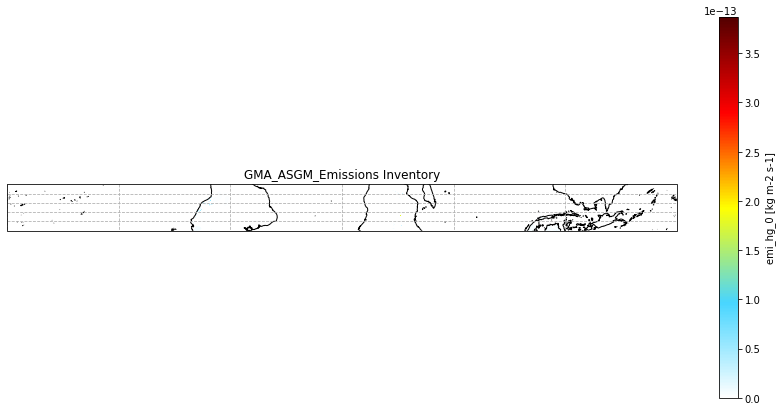

In [60]:
fig = plt.figure(figsize=[15, 7])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')

GMA_asgm['emi_hg_0'].plot(ax=ax,cmap=WhGrYlRd)  # The ax keyword is particularly useful for subplots. Can be omitted here.
#ax.set_ylim([0,10^-19])
ax.set_title('GMA_ASGM_Emissions Inventory');

In [40]:
asgm= GMA_asgm['emi_hg_0'].to_dataframe()

In [44]:
asgm.emi_hg_0.max()

3.8650967192424557e-13

In [3]:
Hasgm=xr.open_dataset('/net/geoschem/data/gcgrid/gcdata/ExtData/HEMCO/MERCURY/v2014-09/ARTISANAL/artisanal.geos.4x5.nc')

In [4]:
Hasgm

<xarray.Dataset>
Dimensions:  (lat: 46, lon: 72, time: 1)
Coordinates:
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
  * lat      (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 89.0
  * time     (time) datetime64[ns] 1985-01-01
Data variables:
    Hg0      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.5.5 (http://code.zmaw.de/p...
    Conventions:  COARDS
    history:      Thu Sep 25 11:46:58 2014: cdo divc,31536000.0 tmp.nc artisa...
    Title:        COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-17+)
    Model:        GEOS3
    Delta_Lon:    5.0
    Delta_Lat:    4.0
    NLayers:      48
    Start_Date:   19850101
    Start_Time:   0
    End_Date:     19850101
    End_Time:     0
    Delta_Time:   0
    CDO:          Climate Data Operators version 1.5.5 (http://code.zmaw.de/p...

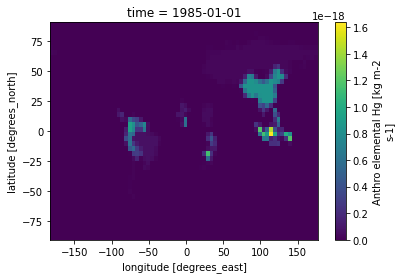

In [5]:
HEMCO= Hasgm['Hg0']
HEMCO.plot()

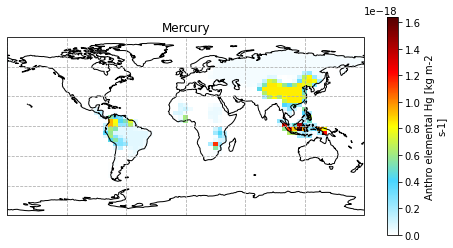

In [8]:
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')

HEMCO.plot(ax=ax,cmap=WhGrYlRd)  # The ax keyword is particularly useful for subplots. Can be omitted here.
ax.set_title('HEMCO_ASGM_Emissions Inventory');

In [14]:
LATAM=HEMCO.loc[dict(lon=slice(-92.0,-25.0),lat=slice(-58,18))]

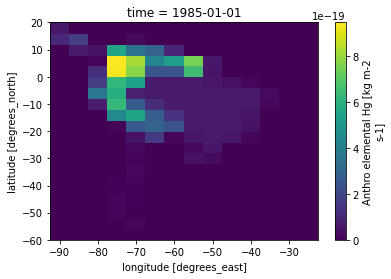

In [15]:
LATAM.plot()

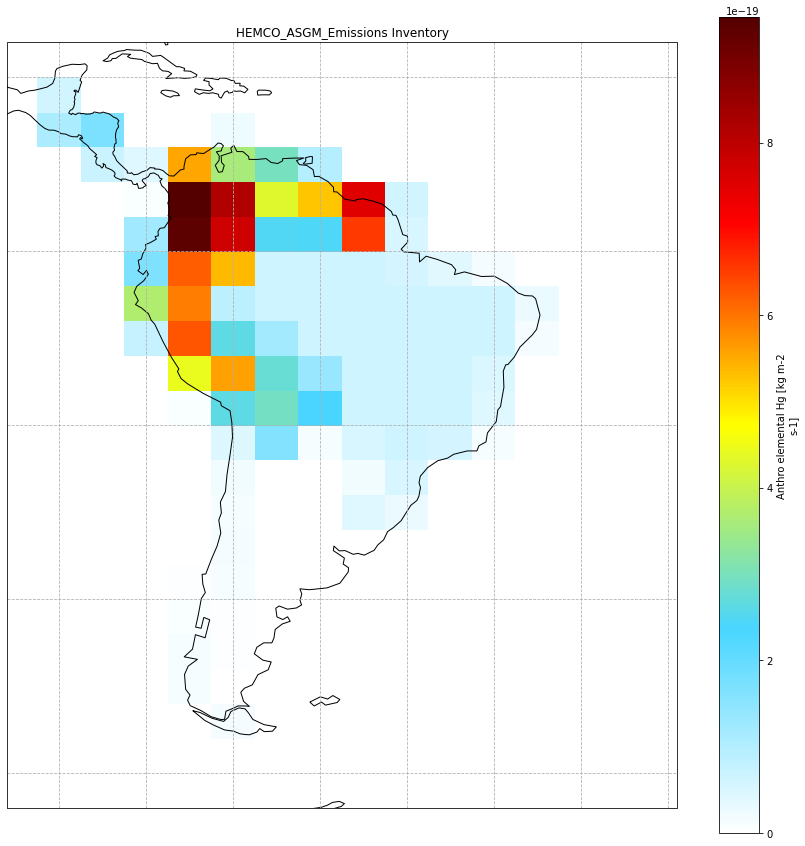

In [64]:
fig = plt.figure(figsize=[15, 15])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')

LATAM.plot(ax=ax,cmap=WhGrYlRd)  # The ax keyword is particularly useful for subplots. Can be omitted here.
ax.set_title('HEMCO_ASGM_Emissions Inventory');

In [21]:
LATAMG=GMA_asgm['emi_hg_0'].loc[dict(lon=slice(-92.0,-25.0),lat=slice(-58,18))]
LATAMG

<xarray.DataArray 'emi_hg_0' (lat: 304, lon: 0)>
array([], shape=(304, 0), dtype=float32)
Coordinates:
  * lon      (lon) float64 
  * lat      (lat) float64 -57.88 -57.62 -57.38 -57.12 ... 17.38 17.62 17.88
Attributes:
    units:    kg m-2 s-1

IndexError: index -1 is out of bounds for axis 0 with size 0

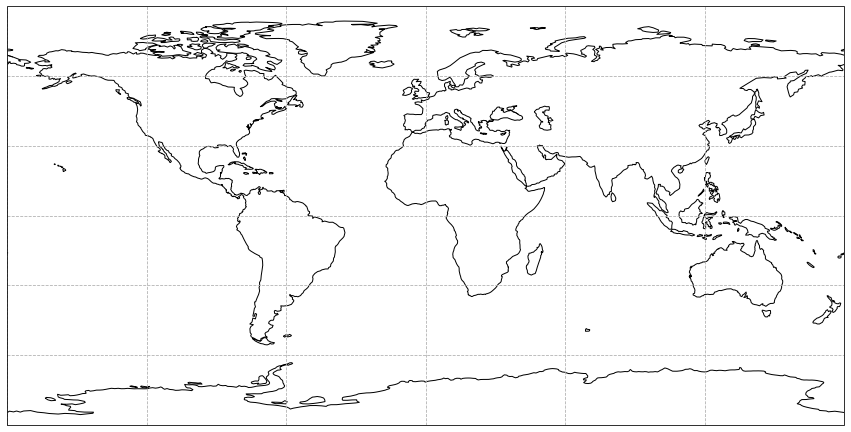

In [20]:
fig = plt.figure(figsize=[15, 8])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle='--')

LATAMG.plot(ax=ax,cmap=WhGrYlRd)  # The ax keyword is particularly useful for subplots. Can be omitted here.
ax.set_title('HEMCO_ASGM_Emissions Inventory');

In [28]:
import geoplot.crs as gcrs
import regionmask 
import geopandas as gpd
import geoplot as gplt

ValueError: too many values to unpack (expected 2)

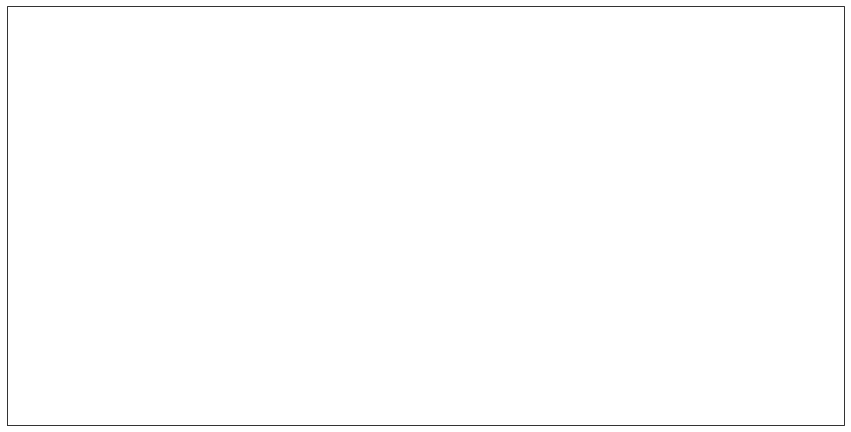

In [63]:
#longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
fig = plt.figure(figsize=[15,15])
Z=LATAM
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
pcm = ax.pcolor(Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax, extend='max')

LATAM.plot(ax=ax, #set the axis
                        #levels = np.arange(0,1e-19,0.0001), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       #cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar
#gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,edgecolor='black', linewidth=0.5
#)
#for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        #ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

ax.set_ylim([0,10^-12])
ax.set_extent([-90, -25, -55, 16])
ax.coastlines() #add coastlines
#-92ax.set_extent([-150, -20, -90, 90])
plt.title('Annual Averaged Hg0', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [52]:
range(0,1.1e-13)

TypeError: 'float' object cannot be interpreted as an integer

In [50]:
1.1e-13


1.1e-13

In [57]:
np.arange(0, 3.8650967192424557e-13, dtype=np.longfloat)

array([0.], dtype=float128)